In [40]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx
# Notebook para integrar los multiples CSV files 
# obtenidos de https://www.histdata.com/download-free-forex-historical-data/?/ascii/1-minute-bar-quotes/EURUSD
# en un solo Dataset y realizar resampling

import numpy as np
np.random.seed(1)
import tensorflow
tensorflow.random.set_seed(2)

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import plotly.graph_objects as go

import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import math as m
import os, glob

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
#LOAD DATASET for ASK
# change column names
#load Dataset for BID
#change column names

pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/eurusd/1M/')
filenames = glob.glob(source_data + "/*.*")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))


01_EURUSD_Candlestick_1_M_ASK_31.12.2003-31.12.2005.csv
01_EURUSD_Candlestick_1_M_BID_31.12.2003-31.12.2005.csv
02_EURUSD_Candlestick_1_M_ASK_31.12.2005-31.12.2006.csv
02_EURUSD_Candlestick_1_M_BID_31.12.2005-31.12.2006.csv
03_EURUSD_Candlestick_1_M_ASK_31.12.2006-31.12.2007.csv
03_EURUSD_Candlestick_1_M_BID_31.12.2006-31.12.2007.csv
04_EURUSD_Candlestick_1_M_ASK_31.12.2007-31.12.2010.csv
04_EURUSD_Candlestick_1_M_BID_31.12.2007-31.12.2010.csv
05_EURUSD_Candlestick_1_M_ASK_31.12.2010-31.12.2013.csv
05_EURUSD_Candlestick_1_M_BID_31.12.2010-31.12.2013.csv
06_EURUSD_Candlestick_1_M_ASK_31.12.2013-31.12.2016.csv
06_EURUSD_Candlestick_1_M_BID_31.12.2013-31.12.2016.csv
07_EURUSD_Candlestick_1_M_ASK_31.12.2016-31.12.2019.csv
07_EURUSD_Candlestick_1_M_BID_31.12.2016-31.12.2019.csv
08_EURUSD_Candlestick_1_M_ASK_31.12.2019-31.05.2020.csv
09_EURUSD_Candlestick_1_M_BID_31.12.2019-31.05.2020.csv


In [43]:
print(int(len(filenames)))

16


In [44]:
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_ASK_01 = pd.read_csv(filenames[0], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_02 = pd.read_csv(filenames[2], header=0, parse_dates=['Gmt time'], date_parser=dateparse)


In [45]:
DATASET_ASK_01 = DATASET_ASK_01.set_index("Gmt time")
DATASET_ASK_02 = DATASET_ASK_02.set_index("Gmt time")


In [46]:
print(DATASET_ASK_01)
print(DATASET_ASK_02)

                        Open     High      Low    Close  Volume
Gmt time                                                       
2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3
2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9
2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0
2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7
2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2
...                      ...      ...      ...      ...     ...
2005-12-30 21:55:00  1.18463  1.18463  1.18439  1.18448   700.0
2005-12-30 21:56:00  1.18452  1.18474  1.18448  1.18474   662.4
2005-12-30 21:57:00  1.18478  1.18478  1.18465  1.18468   390.3
2005-12-30 21:58:00  1.18470  1.18473  1.18463  1.18465   307.8
2005-12-30 21:59:00  1.18470  1.18478  1.18460  1.18465   341.3

[749733 rows x 5 columns]
                        Open     High      Low    Close  Volume
Gmt time                                                       
2006-01-01 22

In [47]:
DATASET_FULL = DATASET_ASK_01.append(DATASET_ASK_02, ignore_index = False)
print(DATASET_FULL.shape)

(1124230, 5)


In [48]:
print(DATASET_FULL)

                        Open     High      Low    Close  Volume
Gmt time                                                       
2004-01-01 00:00:00  1.25950  1.25960  1.25946  1.25953   499.3
2004-01-01 00:01:00  1.25953  1.25953  1.25908  1.25910   822.9
2004-01-01 00:02:00  1.25907  1.25910  1.25897  1.25901   438.0
2004-01-01 00:05:00  1.25910  1.25920  1.25906  1.25915   704.7
2004-01-01 00:06:00  1.25911  1.25920  1.25908  1.25909   164.2
...                      ...      ...      ...      ...     ...
2006-12-31 23:55:00  1.31911  1.31933  1.31911  1.31922   744.1
2006-12-31 23:56:00  1.31930  1.31932  1.31912  1.31925   729.5
2006-12-31 23:57:00  1.31911  1.31924  1.31908  1.31915   624.4
2006-12-31 23:58:00  1.31911  1.31932  1.31907  1.31916   951.5
2006-12-31 23:59:00  1.31923  1.31935  1.31914  1.31923   714.6

[1124230 rows x 5 columns]


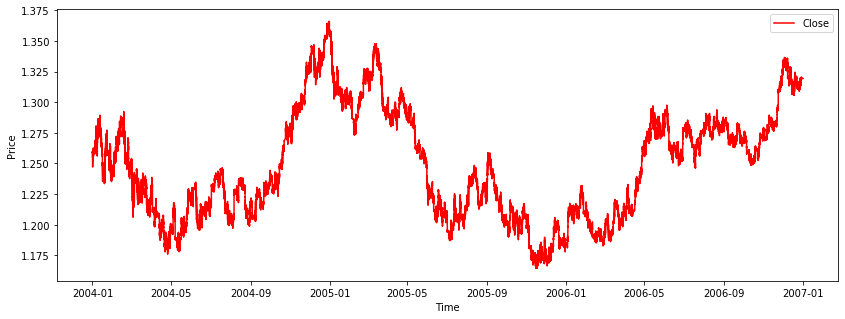

In [49]:
INICIO = 0
FIN = 1124230
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
DATASET_ASK_03 = pd.read_csv(filenames[4], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_03 = DATASET_ASK_03.set_index("Gmt time")

In [51]:
DATASET_ASK_03

,Open,High,Low,Close,Volume
Gmt time,,,,,
2007-01-01 00:00:00,1.31924,1.31935,1.31915,1.31923,753.4
2007-01-01 00:01:00,1.31937,1.31975,1.31930,1.31959,706.6
2007-01-01 00:02:00,1.31962,1.31977,1.31955,1.31968,666.8
2007-01-01 00:03:00,1.31968,1.31975,1.31953,1.31959,597.9
2007-01-01 00:04:00,1.31959,1.31975,1.31948,1.31957,626.7
...,...,...,...,...,...
2007-12-31 23:55:00,1.45865,1.45874,1.45858,1.45869,254.6
2007-12-31 23:56:00,1.45871,1.45872,1.45852,1.45860,332.8
2007-12-31 23:57:00,1.45860,1.45866,1.45852,1.45860,489.1


In [52]:
DATASET_FULL1 = DATASET_FULL.append(DATASET_ASK_03, ignore_index = False)
print(DATASET_FULL1.shape)

(1500031, 5)


In [53]:
DATASET_FULL1

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.3
2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.9
2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.0
2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.7
2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.2
...,...,...,...,...,...
2007-12-31 23:55:00,1.45865,1.45874,1.45858,1.45869,254.6
2007-12-31 23:56:00,1.45871,1.45872,1.45852,1.45860,332.8
2007-12-31 23:57:00,1.45860,1.45866,1.45852,1.45860,489.1


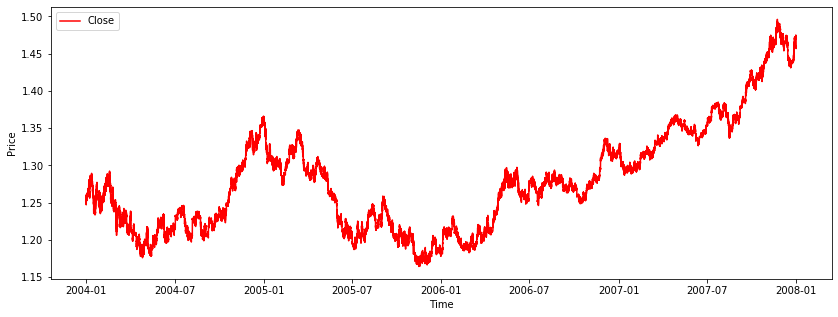

In [54]:
INICIO = 0
FIN = 1500031
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL1["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
DATASET_ASK_04 = pd.read_csv(filenames[6], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_04 = DATASET_ASK_04.set_index("Gmt time")

In [56]:
DATASET_ASK_04

,Open,High,Low,Close,Volume
Gmt time,,,,,
2008-01-01 00:00:00,1.45857,1.45875,1.45849,1.45852,364.000
2008-01-01 00:01:00,1.45853,1.45853,1.45840,1.45848,415.300
2008-01-01 00:02:00,1.45848,1.45848,1.45808,1.45812,529.275
2008-01-01 00:03:00,1.45807,1.45818,1.45785,1.45806,361.700
2008-01-01 00:04:00,1.45802,1.45811,1.45788,1.45802,554.800
...,...,...,...,...,...
2010-12-31 21:55:00,1.33910,1.33910,1.33910,1.33910,1.500
2010-12-31 21:56:00,1.33902,1.33919,1.33864,1.33907,26.650
2010-12-31 21:57:00,1.33902,1.33902,1.33889,1.33892,6.000


In [57]:
DATASET_FULL2 = DATASET_FULL1.append(DATASET_ASK_04, ignore_index = False)
print(DATASET_FULL2.shape)

(2628387, 5)


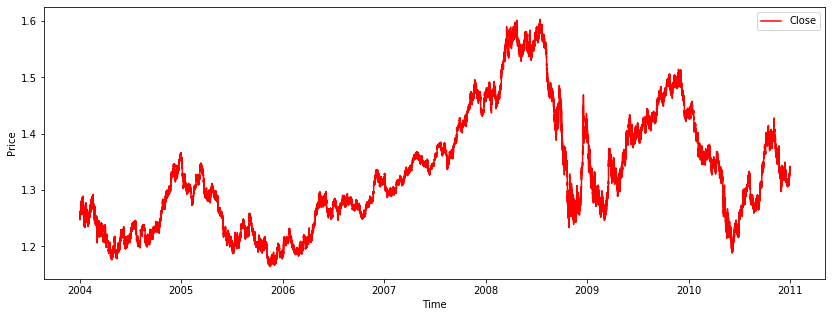

In [58]:
INICIO = 0
FIN = 2628387
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL2["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
DATASET_ASK_05 = pd.read_csv(filenames[8], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_05 = DATASET_ASK_05.set_index("Gmt time")

In [60]:
DATASET_ASK_05

,Open,High,Low,Close,Volume
Gmt time,,,,,
2011-01-02 22:00:00,1.33466,1.33480,1.33466,1.33474,4.50
2011-01-02 22:01:00,1.33460,1.33469,1.33450,1.33451,16.42
2011-01-02 22:02:00,1.33447,1.33490,1.33447,1.33490,7.50
2011-01-02 22:03:00,1.33479,1.33480,1.33479,1.33480,7.50
2011-01-02 22:04:00,1.33481,1.33483,1.33475,1.33475,33.20
...,...,...,...,...,...
2013-12-31 21:56:00,1.37475,1.37503,1.37475,1.37493,25.38
2013-12-31 21:57:00,1.37493,1.37493,1.37483,1.37493,6.50
2013-12-31 21:58:00,1.37493,1.37493,1.37443,1.37443,22.13


In [61]:
DATASET_FULL3 = DATASET_FULL2.append(DATASET_ASK_05, ignore_index = False)
print(DATASET_FULL3.shape)

(3750980, 5)


In [62]:
DATASET_FULL3

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.30
2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.90
2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.00
2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.70
2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.20
...,...,...,...,...,...
2013-12-31 21:56:00,1.37475,1.37503,1.37475,1.37493,25.38
2013-12-31 21:57:00,1.37493,1.37493,1.37483,1.37493,6.50
2013-12-31 21:58:00,1.37493,1.37493,1.37443,1.37443,22.13


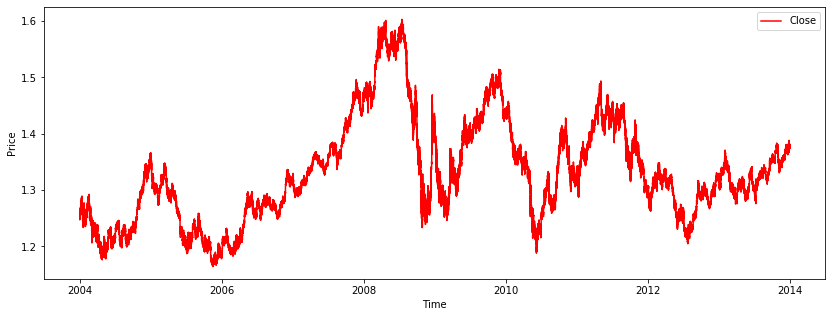

In [63]:
INICIO = 0
FIN = 3750980
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL3["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
DATASET_ASK_06 = pd.read_csv(filenames[10], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_06 = DATASET_ASK_06.set_index("Gmt time")

In [65]:
DATASET_ASK_06

,Open,High,Low,Close,Volume
Gmt time,,,,,
2014-01-01 22:00:00,1.37637,1.37637,1.37637,1.37637,0.25
2014-01-01 22:01:00,1.37637,1.37648,1.37607,1.37607,4.78
2014-01-01 22:02:00,1.37597,1.37610,1.37557,1.37557,5.43
2014-01-01 22:03:00,1.37550,1.37550,1.37550,1.37550,1.90
2014-01-01 22:04:00,1.37560,1.37560,1.37550,1.37550,1.87
...,...,...,...,...,...
2016-12-30 21:55:00,1.05190,1.05191,1.05177,1.05184,109.90
2016-12-30 21:56:00,1.05184,1.05240,1.05176,1.05210,147.76
2016-12-30 21:57:00,1.05211,1.05345,1.05208,1.05301,239.24


In [66]:
DATASET_FULL4 = DATASET_FULL3.append(DATASET_ASK_06, ignore_index = False)
print(DATASET_FULL4.shape)

(4869451, 5)


In [67]:
DATASET_FULL4

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.30
2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.90
2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.00
2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.70
2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.20
...,...,...,...,...,...
2016-12-30 21:55:00,1.05190,1.05191,1.05177,1.05184,109.90
2016-12-30 21:56:00,1.05184,1.05240,1.05176,1.05210,147.76
2016-12-30 21:57:00,1.05211,1.05345,1.05208,1.05301,239.24


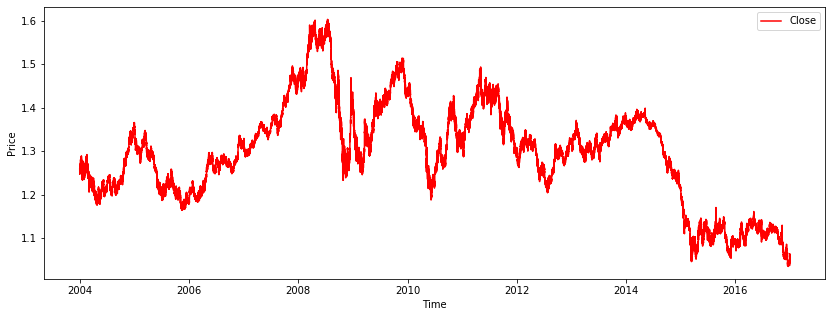

In [68]:
INICIO = 0
FIN = 4869451
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL4["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
DATASET_ASK_07 = pd.read_csv(filenames[12], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_07 = DATASET_ASK_07.set_index("Gmt time")

In [70]:
DATASET_ASK_07

,Open,High,Low,Close,Volume
Gmt time,,,,,
2017-01-01 22:00:00,1.05236,1.05236,1.05236,1.05236,1.50
2017-01-01 22:01:00,1.05236,1.05236,1.05236,1.05236,0.75
2017-01-01 22:02:00,1.05236,1.05248,1.05225,1.05225,4.87
2017-01-01 22:03:00,1.05226,1.05226,1.05225,1.05225,0.74
2017-01-01 22:08:00,1.05227,1.05227,1.05226,1.05226,1.50
...,...,...,...,...,...
2019-12-31 21:55:00,1.12121,1.12124,1.12119,1.12124,16.12
2019-12-31 21:56:00,1.12123,1.12124,1.12119,1.12121,16.12
2019-12-31 21:57:00,1.12120,1.12120,1.12112,1.12112,14.43


In [71]:
DATASET_FULL5 = DATASET_FULL4.append(DATASET_ASK_07, ignore_index = False)
print(DATASET_FULL5.shape)

(5989255, 5)


In [72]:
DATASET_FULL5

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.30
2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.90
2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.00
2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.70
2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.20
...,...,...,...,...,...
2019-12-31 21:55:00,1.12121,1.12124,1.12119,1.12124,16.12
2019-12-31 21:56:00,1.12123,1.12124,1.12119,1.12121,16.12
2019-12-31 21:57:00,1.12120,1.12120,1.12112,1.12112,14.43


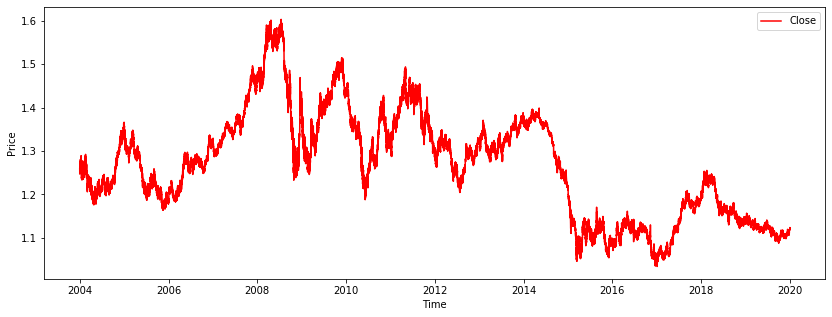

In [73]:
INICIO = 0
FIN = 5989255
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL5["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [74]:
DATASET_ASK_08 = pd.read_csv(filenames[14], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_08 = DATASET_ASK_08.set_index("Gmt time")

In [75]:
DATASET_FULL6 = DATASET_FULL5.append(DATASET_ASK_08, ignore_index = False)
print(DATASET_FULL6.shape)

(6144655, 5)


In [76]:
DATASET_FULL6

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25950,1.25960,1.25946,1.25953,499.30
2004-01-01 00:01:00,1.25953,1.25953,1.25908,1.25910,822.90
2004-01-01 00:02:00,1.25907,1.25910,1.25897,1.25901,438.00
2004-01-01 00:05:00,1.25910,1.25920,1.25906,1.25915,704.70
2004-01-01 00:06:00,1.25911,1.25920,1.25908,1.25909,164.20
...,...,...,...,...,...
2020-06-01 23:55:00,1.11263,1.11265,1.11260,1.11261,88.08
2020-06-01 23:56:00,1.11261,1.11262,1.11256,1.11256,64.01
2020-06-01 23:57:00,1.11256,1.11256,1.11242,1.11246,202.11


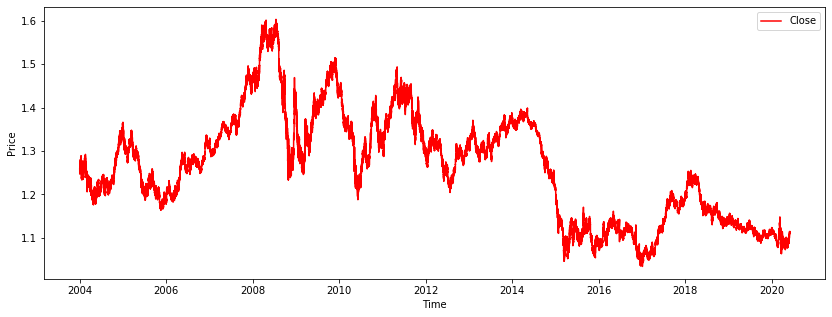

In [77]:
INICIO = 0
FIN = 6144655
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL6["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/eurusd/1M/FULL/FULL_EURUSD_1M_ASK_31.12.2003-31.05.2020.csv')
DATASET_FULL6.to_csv (source_data, index = True, header=True)